# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

plt.style.use('dark_background')

# Data visualization

In [2]:
df = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
df = pd.concat([df,df_test])
df

/usr/lib/python3.11/site-packages/IPython/lib/pretty.py:778: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/usr/lib/python3.11/site-packages/IPython/core/formatters.py:344: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN


In [3]:
df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported      object
dtype: object

In [4]:
df.shape

(12970, 14)

In [5]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,12700.000000,12707.000000,12681.000000,12664.000000,12686.000000,12702.000000
mean,28.771969,222.897852,451.961675,174.906033,308.476904,306.789482
std,14.387261,647.596664,1584.370747,590.558690,1130.279641,1180.097223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,49.000000,77.000000,29.000000,57.000000,42.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported      object
dtype: object

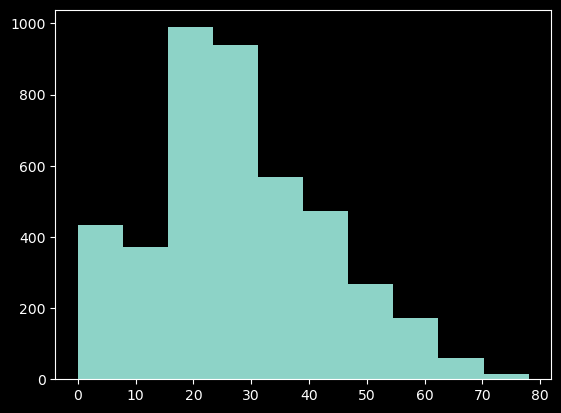

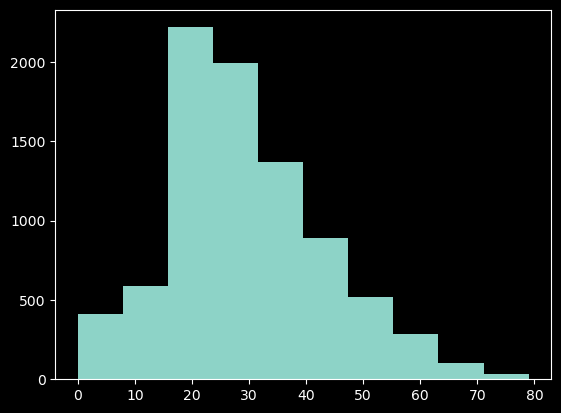

In [7]:
plt.hist(df[df['Transported']==True]['Age'],label="Transported")
plt.show()
plt.hist(df[df['Transported']!=True]['Age'],label="Not Transported")
plt.show()

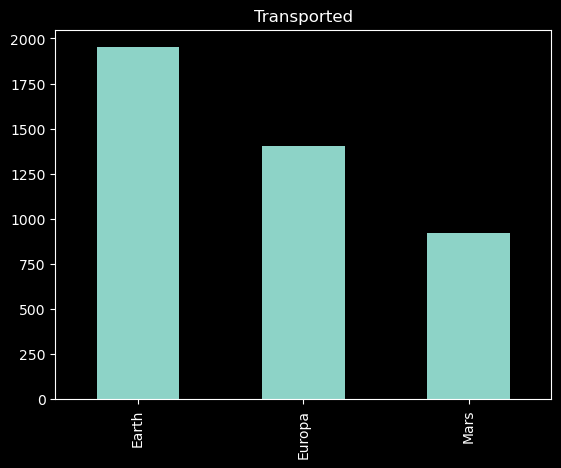

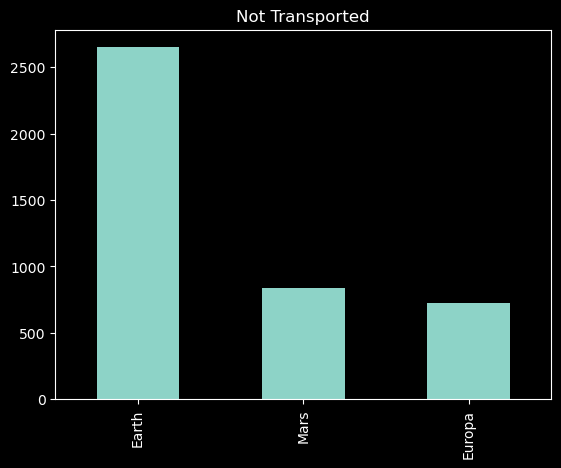

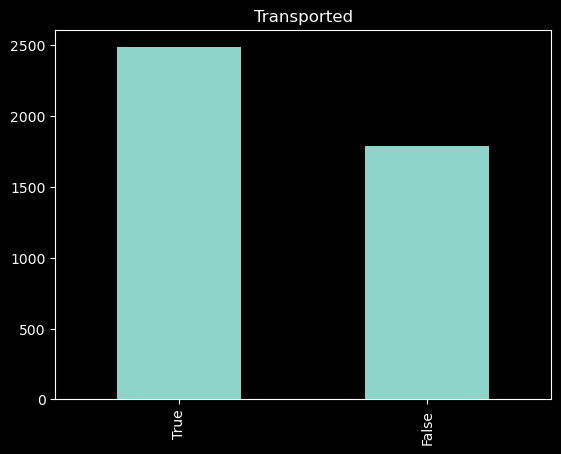

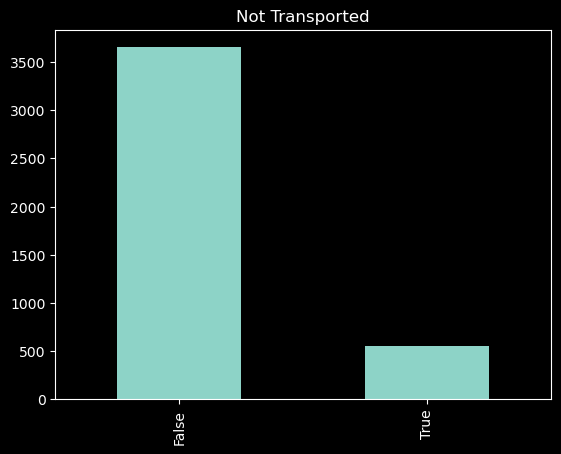

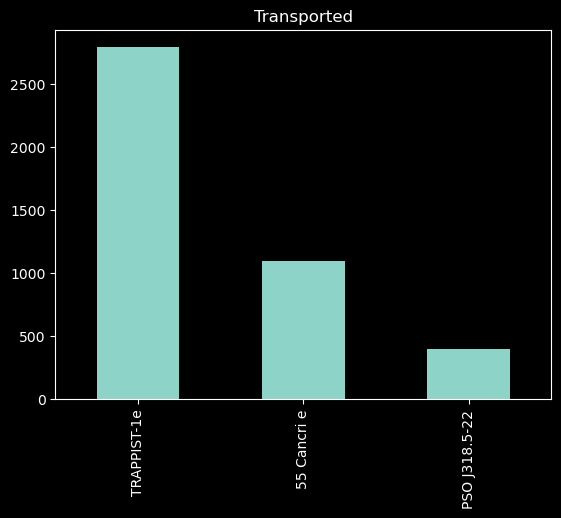

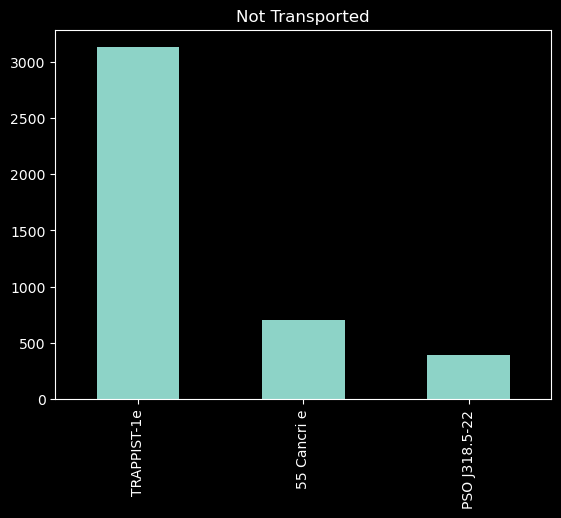

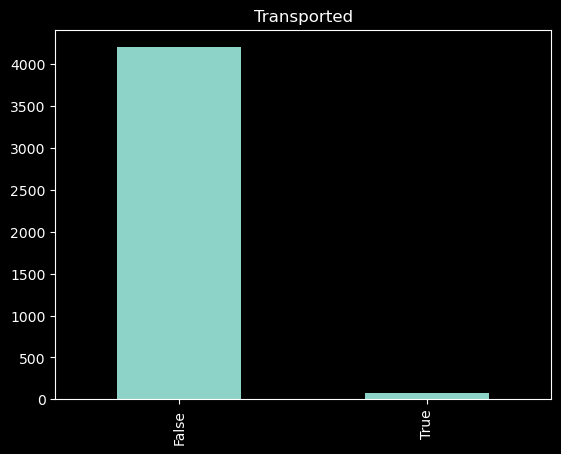

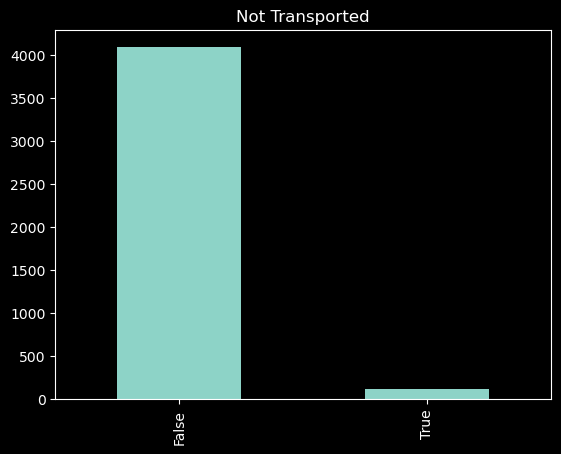

In [8]:
columns = ['HomePlanet','CryoSleep','Destination','VIP']
for col in columns:
    plt.title('Transported')
    df[df['Transported'] == True][col].value_counts().plot(kind='bar')
    plt.show()
    
    plt.title('Not Transported')
    df[df['Transported'] == False][col].value_counts().plot(kind='bar')
    plt.show()

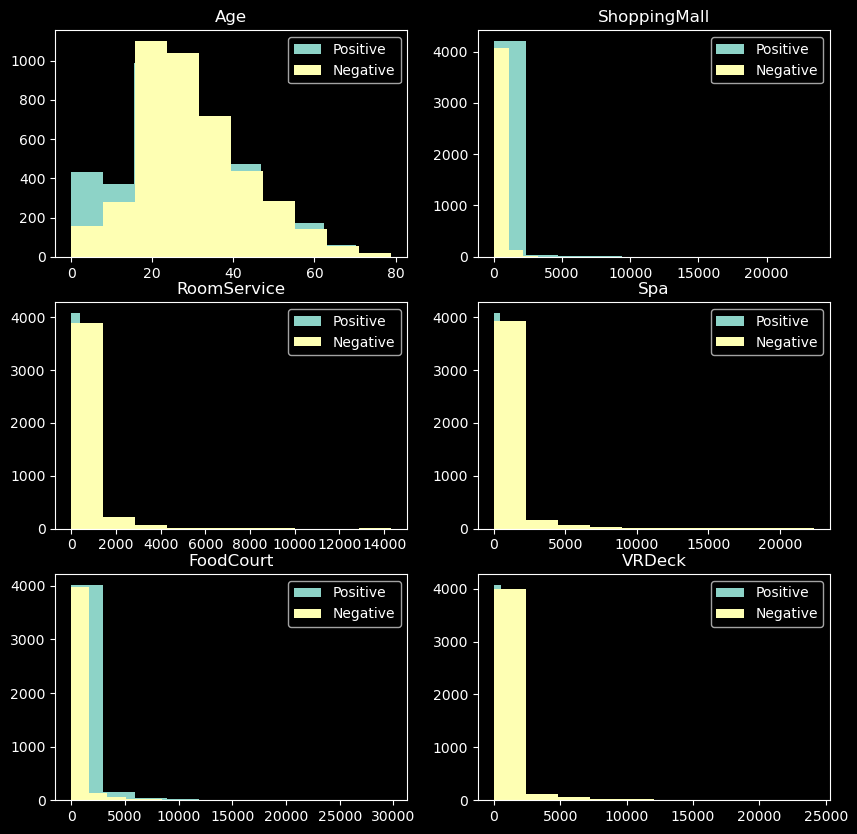

In [9]:
columns = ['Age', 'RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10,10))
for i,col in enumerate(columns):
    pos = df[df['Transported'] == 1][col]
    neg = df[df['Transported'] == 0][col]
    axs[i%3,i//3].hist(pos, label="Positive")
    axs[i%3,i//3].hist(neg, label="Negative")
    axs[i%3,i//3].legend()
    axs[i%3,i//3].set_title(col)

plt.show()

# Feature engineering

In [10]:
df.reset_index(inplace=True)

In [11]:
df.head()

,index,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [12]:
df.isnull().sum()

index              0
PassengerId        0
HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
dtype: int64

In [13]:
df['Group'] = df['PassengerId'].str.split('_', expand=True)[0].astype(str)

In [14]:
df['Cabin']

0           B/0/P
1           F/0/S
2           A/0/S
3           A/0/S
4           F/1/S
           ...   
12965    G/1496/S
12966         NaN
12967     D/296/P
12968     D/297/P
12969    G/1498/S
Name: Cabin, Length: 12970, dtype: object

In [15]:
df[['Deck','CabinNumber','Side']] = df['Cabin'].str.split('/', expand=True)

In [16]:
df.head()

,index,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Deck,CabinNumber,Side
0,0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,B,0,P
1,1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,F,0,S
2,2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,A,0,S
3,3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,A,0,S
4,4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,F,1,S


In [17]:
df['CabinNumber'] = df['CabinNumber'].astype(int, errors='ignore')

In [18]:
df['LastName'] = df['Name'].str.split(' ', expand=True)[1]

In [19]:
df['PassengerId'].unique().shape

(12970,)

In [20]:
df.shape

(12970, 20)

In [21]:
df.set_index('PassengerId', inplace=True)

In [22]:
df.head()

,index,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Deck,CabinNumber,Side,LastName
PassengerId,,,,,,,,,,,,,,,,,,,
0001_01,0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,B,0,P,Ofracculy
0002_01,1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,F,0,S,Vines
0003_01,2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,A,0,S,Susent
0003_02,3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,A,0,S,Susent
0004_01,4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,F,1,S,Santantines


In [23]:
df.describe()

,index,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,12970.000000,12700.000000,12707.000000,12681.000000,12664.000000,12686.000000,12702.000000
mean,3617.887741,28.771969,222.897852,451.961675,174.906033,308.476904,306.789482
std,2408.607419,14.387261,647.596664,1584.370747,590.558690,1130.279641,1180.097223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1621.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3242.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5449.750000,38.000000,49.000000,77.000000,29.000000,57.000000,42.000000
max,8692.000000,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [24]:
df.isna().sum()

index              0
HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
Group              0
Deck             299
CabinNumber      299
Side             299
LastName         294
dtype: int64

In [25]:
df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','CryoSleep']].groupby('CryoSleep').value_counts()

CryoSleep  RoomService  FoodCourt  ShoppingMall  Spa     VRDeck
False      0.0          0.0        0.0           0.0     0.0        667
                                   717.0         0.0     0.0          4
                                   885.0         0.0     0.0          3
                                   0.0           0.0     908.0        3
                        717.0      0.0           0.0     0.0          2
                                                                   ... 
                        2177.0     0.0           1097.0  144.0        1
                        2161.0     0.0           4702.0  78.0         1
                        2154.0     0.0           9655.0  859.0        1
           13.0         0.0        2.0           673.0   3.0          1
True       0.0          0.0        0.0           0.0     0.0       4068
Length: 6569, dtype: int64

CryoSleep == True -> Luxury amenities = 0

In [26]:
df[df['Age'] < 13 ][['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].sum()

RoomService     0.0
FoodCourt       0.0
ShoppingMall    0.0
Spa             0.0
VRDeck          0.0
dtype: float64

Age < 13 -> Luxury Amenities = 0

In [27]:
df["RoomService"] = np.where((df["Age"] < 13) | (df["CryoSleep"] == True), 0, df["RoomService"])
df["FoodCourt"] = np.where((df["Age"] < 13) | (df["CryoSleep"] == True), 0, df["FoodCourt"])
df["ShoppingMall"] = np.where((df["Age"] < 13) | (df["CryoSleep"] == True), 0, df["ShoppingMall"])
df["Spa"] = np.where((df["Age"] < 13) | (df["CryoSleep"] == True), 0, df["Spa"])
df["VRDeck"] = np.where((df["Age"] < 13) | (df["CryoSleep"] == True), 0, df["VRDeck"])

In [28]:
df.isna().sum()

index              0
HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      162
FoodCourt        171
ShoppingMall     163
Spa              166
VRDeck           150
Name             294
Transported     4277
Group              0
Deck             299
CabinNumber      299
Side             299
LastName         294
dtype: int64

<Axes: >

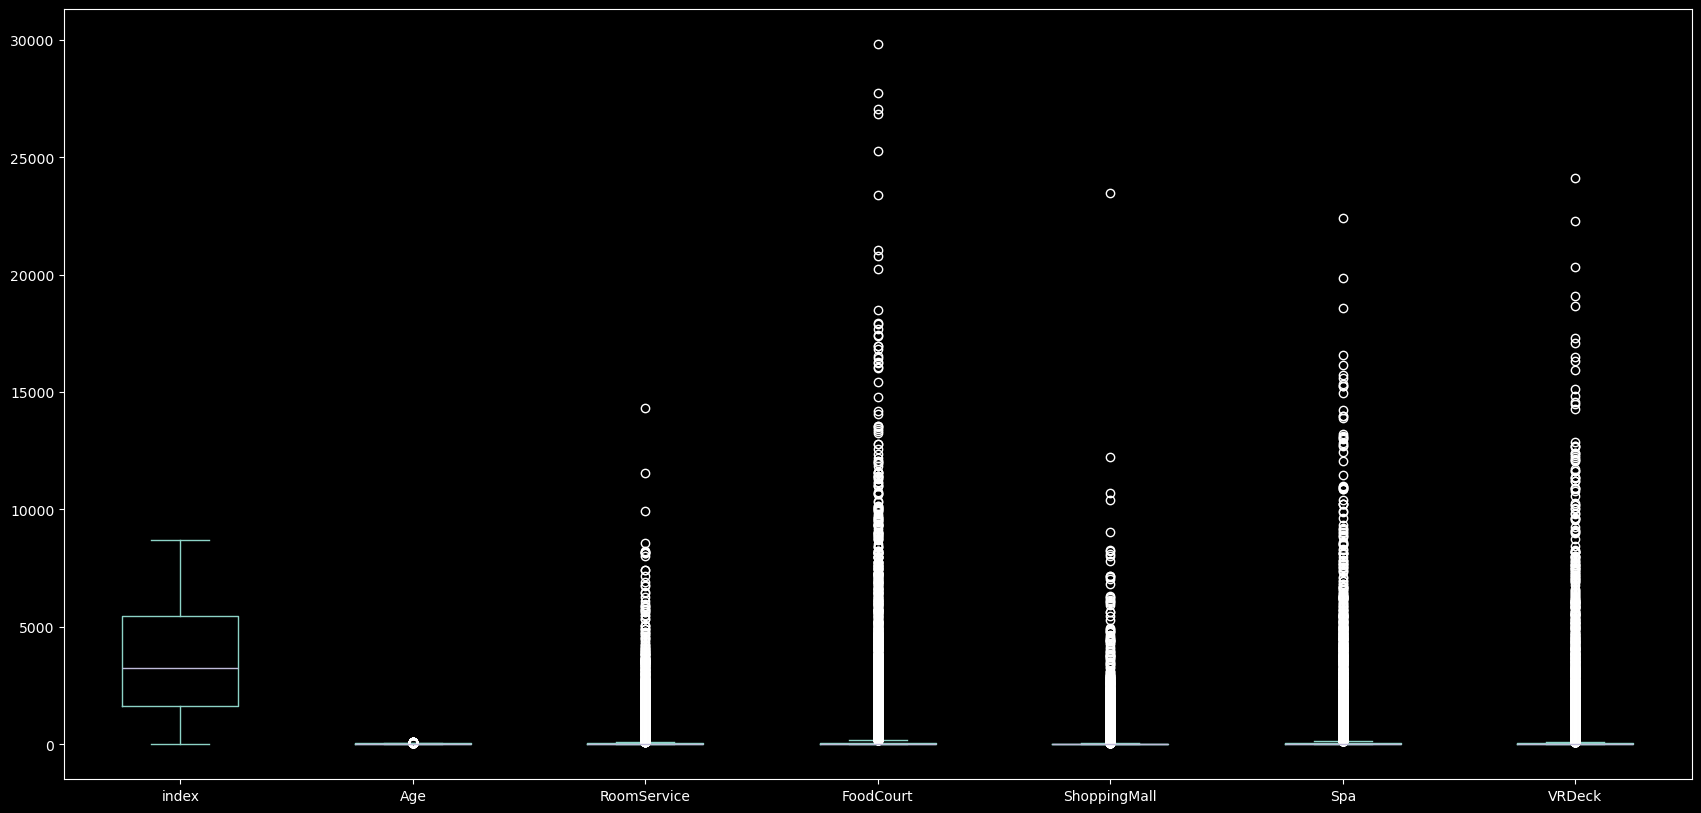

In [29]:
df.plot.box(figsize=(21,10))

In [30]:
def quantile_remap(df):
    quantile_values = df[["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].quantile(0.99)
    
    for num_column in ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]:
        num_values = df[num_column].values
        threshold = quantile_values[num_column]
        num_values = np.where(num_values > threshold, threshold, num_values)
        print(num_values)
        df[num_column] = num_values

In [31]:
quantile_remap(df)
df['RoomService'].value_counts()

[  0. 109.  43. ...   0.   0.   0.]
[   0.    9. 3576. ...    0. 2680.    0.]
[ 0. 25.  0. ...  0.  0.  0.]
[   0.    549.   5390.88 ...    0.      0.      0.  ]
[  0.  44.  49. ...   0. 523.   0.]


0.00       8404
1.00        185
3001.65     129
2.00        113
3.00         89
           ... 
1307.00       1
971.00        1
1528.00       1
859.00        1
652.00        1
Name: RoomService, Length: 1454, dtype: int64

In [32]:
df["Regular"] = df["FoodCourt"] + df["ShoppingMall"] 
df["Luxury"] = df["RoomService"] + df["Spa"] + df["VRDeck"]
df["TotalSpendings"] = df["RoomService"] + df["FoodCourt"] + df["ShoppingMall"] + df["Spa"] + df["VRDeck"]

In [33]:
is_alone = df.reset_index().groupby('Group')['PassengerId'].size() == 1

In [34]:
is_alone = is_alone.reset_index().rename(columns = {"PassengerId": "IsAlone"})
is_alone

,Group,IsAlone
0,0001,True
1,0002,True
2,0003,False
3,0004,True
4,0005,True
...,...,...
9275,9276,True
9276,9277,True
9277,9278,True
9278,9279,True


In [35]:
df = df.reset_index().merge(is_alone[["Group", "IsAlone"]], how = 'left', on = ['Group']).set_index('PassengerId')

In [36]:
df.head()

,index,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Transported,Group,Deck,CabinNumber,Side,LastName,Regular,Luxury,TotalSpendings,IsAlone
PassengerId,,,,,,,,,,,,,,,,,,,,,
0001_01,0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,False,0001,B,0,P,Ofracculy,0.0,0.00,0.00,True
0002_01,1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,True,0002,F,0,S,Vines,34.0,702.00,736.00,True
0003_01,2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,False,0003,A,0,S,Susent,3576.0,5482.88,9058.88,False
0003_02,3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,False,0003,A,0,S,Susent,1654.0,3522.00,5176.00,False
0004_01,4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,True,0004,F,1,S,Santantines,221.0,870.00,1091.00,True


In [37]:
df = df.drop(['Cabin', 'Name'],axis=1)
df

,index,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,Transported,Group,Deck,CabinNumber,Side,LastName,Regular,Luxury,TotalSpendings,IsAlone
PassengerId,,,,,,,,,,,,,,,,,,,,,
0001_01,0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.00,...,False,0001,B,0,P,Ofracculy,0.0,0.00,0.00,True
0002_01,1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.00,...,True,0002,F,0,S,Vines,34.0,702.00,736.00,True
0003_01,2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,5390.88,...,False,0003,A,0,S,Susent,3576.0,5482.88,9058.88,False
0003_02,3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.00,...,False,0003,A,0,S,Susent,1654.0,3522.00,5176.00,False
0004_01,4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.00,...,True,0004,F,1,S,Santantines,221.0,870.00,1091.00,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9266_02,4272,Earth,True,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.00,...,NaN,9266,G,1496,S,Peter,0.0,0.00,0.00,False
9269_01,4273,Earth,False,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.00,...,NaN,9269,NaN,NaN,NaN,Scheron,864.0,154.00,1018.00,True
9271_01,4274,Mars,True,55 Cancri e,NaN,False,0.0,0.0,0.0,0.00,...,NaN,9271,D,296,P,Pore,0.0,0.00,0.00,True


In [38]:
df[['Transported','VIP']] = df[['Transported','VIP']].astype(float)

In [39]:
df['Transported'].isna().sum()

4277

In [40]:
df.dtypes

index               int64
HomePlanet         object
CryoSleep          object
Destination        object
Age               float64
VIP               float64
RoomService       float64
FoodCourt         float64
ShoppingMall      float64
Spa               float64
VRDeck            float64
Transported       float64
Group              object
Deck               object
CabinNumber        object
Side               object
LastName           object
Regular           float64
Luxury            float64
TotalSpendings    float64
IsAlone              bool
dtype: object

In [41]:
df['CabinNumber'] = df['CabinNumber'].astype(int, errors='ignore')
df['CabinNumber']

PassengerId
0001_01       0
0002_01       0
0003_01       0
0003_02       0
0004_01       1
           ... 
9266_02    1496
9269_01     NaN
9271_01     296
9273_01     297
9277_01    1498
Name: CabinNumber, Length: 12970, dtype: object

In [42]:
df.drop('index',axis=1,inplace=True)

# Encoding feature values

In [43]:
label_enc = LabelEncoder()
ord_enc = OrdinalEncoder()
oh_enc = OneHotEncoder(drop='first', sparse_output=False)

In [44]:
label_enc.fit([True,False])

LabelEncoder()

In [45]:
df[['HomePlanet','CryoSleep','Destination','LastName','Deck','Side','VIP','IsAlone']] = ord_enc.fit_transform(df[['HomePlanet','CryoSleep','Destination','LastName','Deck','Side','VIP','IsAlone']])

In [46]:
df_test = df[df['Transported'].isna()].copy()

In [47]:
df_train = df[df['Transported'].isna() != True].copy()

In [48]:
df_train.shape

(8693, 20)

In [49]:
df_test.shape

(4277, 20)

In [50]:
df_test.drop('Transported',axis=1,inplace=True)

In [51]:
imp = KNNImputer()

In [52]:
cols_wo_class = list(df_train.columns)
cols_wo_class.remove('Transported')
imp.fit(df.drop('Transported',axis=1))
df_train[cols_wo_class] = imp.transform(df_train[cols_wo_class])
df_test[cols_wo_class] = imp.transform(df_test[cols_wo_class])

In [54]:
df_train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Group,Deck,CabinNumber,Side,LastName,Regular,Luxury,TotalSpendings,IsAlone
PassengerId,,,,,,,,,,,,,,,,,,,,
0001_01,1.0,0.0,2.0,39.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,1.0,1.0,0.0,0.0,1551.0,0.0,0.00,0.00,1.0
0002_01,0.0,0.0,2.0,24.0,0.0,109.0,9.0,25.0,549.00,44.0,1.0,2.0,5.0,0.0,1.0,2289.0,34.0,702.00,736.00,1.0
0003_01,1.0,0.0,2.0,58.0,1.0,43.0,3576.0,0.0,5390.88,49.0,0.0,3.0,0.0,0.0,1.0,2153.0,3576.0,5482.88,9058.88,0.0
0003_02,1.0,0.0,2.0,33.0,0.0,0.0,1283.0,371.0,3329.00,193.0,0.0,3.0,0.0,0.0,1.0,2153.0,1654.0,3522.00,5176.00,0.0
0004_01,0.0,0.0,2.0,16.0,0.0,303.0,70.0,151.0,565.00,2.0,1.0,4.0,5.0,1.0,1.0,1924.0,221.0,870.00,1091.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,1.0,0.0,0.0,41.0,1.0,0.0,6819.0,0.0,1643.00,74.0,0.0,9276.0,0.0,98.0,0.0,1535.0,6819.0,1717.00,8536.00,1.0
9278_01,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,9278.0,6.0,1499.0,1.0,1452.0,0.0,0.00,0.00,1.0
9279_01,0.0,0.0,2.0,26.0,0.0,0.0,0.0,1872.0,1.00,0.0,1.0,9279.0,6.0,1500.0,1.0,512.0,1872.0,1.00,1873.00,1.0


# Modeling

In [57]:
x_train = df_train.drop('Transported', axis=1)
y_train = df_train['Transported']

In [58]:
dec = RandomForestClassifier(n_jobs=-1, random_state=0)

In [59]:
dec.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [60]:
cross_val_score(dec,x_train,y_train, scoring='accuracy', n_jobs=-1)

array([0.62104658, 0.73720529, 0.79643473, 0.81875719, 0.7543153 ])

In [61]:
gs = GridSearchCV(
    dec,
    {
        "max_depth":[1,2,3,4,5,10],
        "criterion":["gini","entropy","log_loss"],
        "class_weight":["balanced", "balanced_subsample"],
    },
    scoring="accuracy"
)

In [62]:
gs.fit(x_train,y_train)
gs.score(x_train,y_train)

0.7978833544230991

In [63]:
gs.best_params_

{'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': 4}

In [65]:
final = RandomForestClassifier(**gs.best_params_)
final.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=4)

In [67]:
df_test.shape

(4277, 19)

In [71]:
pred = final.predict(df_test)

In [72]:
pred

array([1., 0., 1., ..., 1., 0., 1.])

In [79]:
results = pd.DataFrame(np.vectorize(lambda x:bool(x))(pred), index=df_test.index)
results.columns = ['Transported']
results.to_csv('data/results.csv')

In [78]:
results

,Transported
PassengerId,
0013_01,True
0018_01,False
0019_01,True
0021_01,True
0023_01,True
...,...
9266_02,True
9269_01,False
9271_01,True
